### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

**Lets first load required libraries**

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

### Load Data From CSV File  

In [2]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

### Convert to date time object 

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

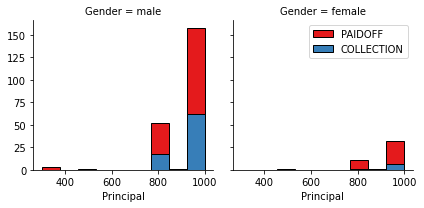

In [6]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

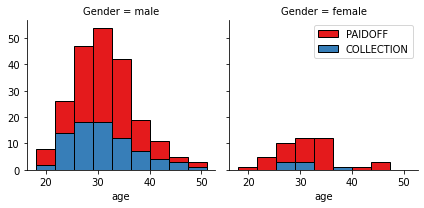

In [7]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

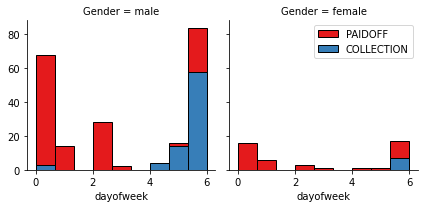

6    166
0     87
5     31
2     31
1     20
4      8
3      3
Name: dayofweek, dtype: int64

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()
df['dayofweek'].value_counts()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [9]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [10]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)*100

Gender  loan_status
female  PAIDOFF        86.538462
        COLLECTION     13.461538
male    PAIDOFF        73.129252
        COLLECTION     26.870748
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [11]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)*100

education             loan_status
Bechalor              PAIDOFF        75.000000
                      COLLECTION     25.000000
High School or Below  PAIDOFF        74.172185
                      COLLECTION     25.827815
Master or Above       COLLECTION     50.000000
                      PAIDOFF        50.000000
college               PAIDOFF        76.510067
                      COLLECTION     23.489933
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [13]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [14]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [15]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [16]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### change categorical to numerical for Logistic Regression

In [17]:
y_LogR = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=False)
y_LogR.values
y_LogR[0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [18]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [19]:
#import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier

#split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print('Train set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_train.shape)

#test with different ks
k=5
#k=6
#k=7

#making an instance of the model and training it
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

#Predicting Model with X_test
yhat_KNN = neigh.predict(X_test)
yhat_KNN[0:5]
yhat_KNN.shape

# Accuracy
from sklearn import metrics
print("\nTrain set Accuracy %.2f"% metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: %.2f"% metrics.accuracy_score(y_test, yhat_KNN))
print('with k =',k)


Train set (259, 8) (259,)
Test set (87, 8) (259,)

Train set Accuracy 0.81
Test set Accuracy: 0.79
with k = 5


[0.73563218 0.71264368 0.75862069 0.73563218 0.79310345 0.7816092
 0.79310345 0.7816092  0.77011494 0.71264368 0.7816092  0.73563218
 0.72413793 0.74712644]


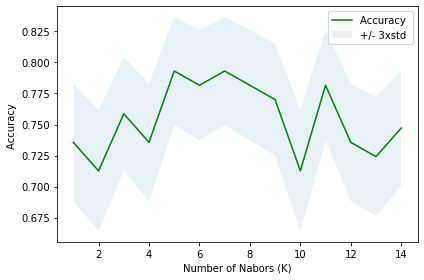

The best accuracy of KNN is: 0.79 with k= 5


In [20]:
#accuracy of KNN for different Ks
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []

for n in range(1,Ks):# for loop 1 to 10
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_KNN=neigh.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_KNN)
    std_acc[n-1]=np.std(yhat_KNN==y_test)/np.sqrt(yhat_KNN.shape[0])

print(mean_acc)

# plot for mdel accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


print('The best accuracy of KNN is: %.2f'% mean_acc.max(), "with k=", mean_acc.argmax()+1)
#mean_acc.max()

# Decision Tree

In [21]:
# load the necessary libraries
from sklearn.tree import DecisionTreeClassifier

# #split dataset into train and test set
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X, y, test_size=0.30, random_state=3)
print ('Train set:', X_trainDT.shape,  y_trainDT.shape)
print ('Test set:', X_testDT.shape,  y_testDT.shape)

max_depth =5

#making an instance of the model and training it
#DTree = DecisionTreeClassifier(criterion='gini', max_depth = depth)
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth)

#fit the data with the training feature X_trainDT and y_trainDT
DTree.fit(X_trainDT,y_trainDT)

#Predicting Model with X_test
yhat_DT = DTree.predict(X_testDT)
#yhat_DT
yhat_DT.shape

# evaluation
print('\nDecisionTrees Train set Accuracy is: %.2f'% metrics.accuracy_score(y_trainDT, DTree.predict(X_trainDT)))
print('DecisionTrees Test set Accuracy is: %.2f'% metrics.accuracy_score(y_testDT, yhat_DT))



Train set: (242, 8) (242,)
Test set: (104, 8) (104,)

DecisionTrees Train set Accuracy is: 0.81
DecisionTrees Test set Accuracy is: 0.68


In [22]:
# List of values to try for max_depth:
max_depth_range = list(range(3, 10))

# initialize
TrainSet_accuracy,TestSet_accuracy,Score_Acc, max_depth_best = [],[],[],[]

for depth in max_depth_range:
    
    #specify criterion="entropy" to see the information gain of each node
    #DTree = DecisionTreeClassifier(criterion='gini', max_depth = depth)
    DTree = DecisionTreeClassifier(criterion="entropy", max_depth = depth)# better accuracy
    
    #fit the data with the training feature X_trainDT and y_trainDT
    DTree.fit(X_trainDT,y_trainDT)
    
    #Predicting Model with (X_testDT)
    yhat_DT = DTree.predict(X_testDT)
    
    # Accuracy evaluation
    TrainSet_accuracy.append(DTree.score(X_trainDT,y_trainDT))
    TestSet_accuracy.append(DTree.score(X_testDT, y_testDT))
    #Score_Acc.append(metrics.accuracy_score(y_testDT, yhat_DT))
    
    #import metrics from sklearn 
    acc = metrics.accuracy_score(y_testDT, yhat_DT)
    #print("Accuracy of decision tree: ", acc, ", depth = ", depth)
    
    Score_Acc.append(acc)
    #get the depth for acc max
    if acc== max(Score_Acc):
        max_depth_best = depth
        
# accuracy evaluation
print('TestSet_accuracy is: {:.2f}'.format(max(TestSet_accuracy)))
print("The best accuracy of Decision Tree with a max depth of", max_depth_best, 'is : %.2f'% max(Score_Acc))


TestSet_accuracy is: 0.70
The best accuracy of Decision Tree with a max depth of 6 is : 0.70


## Visualization

In [23]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

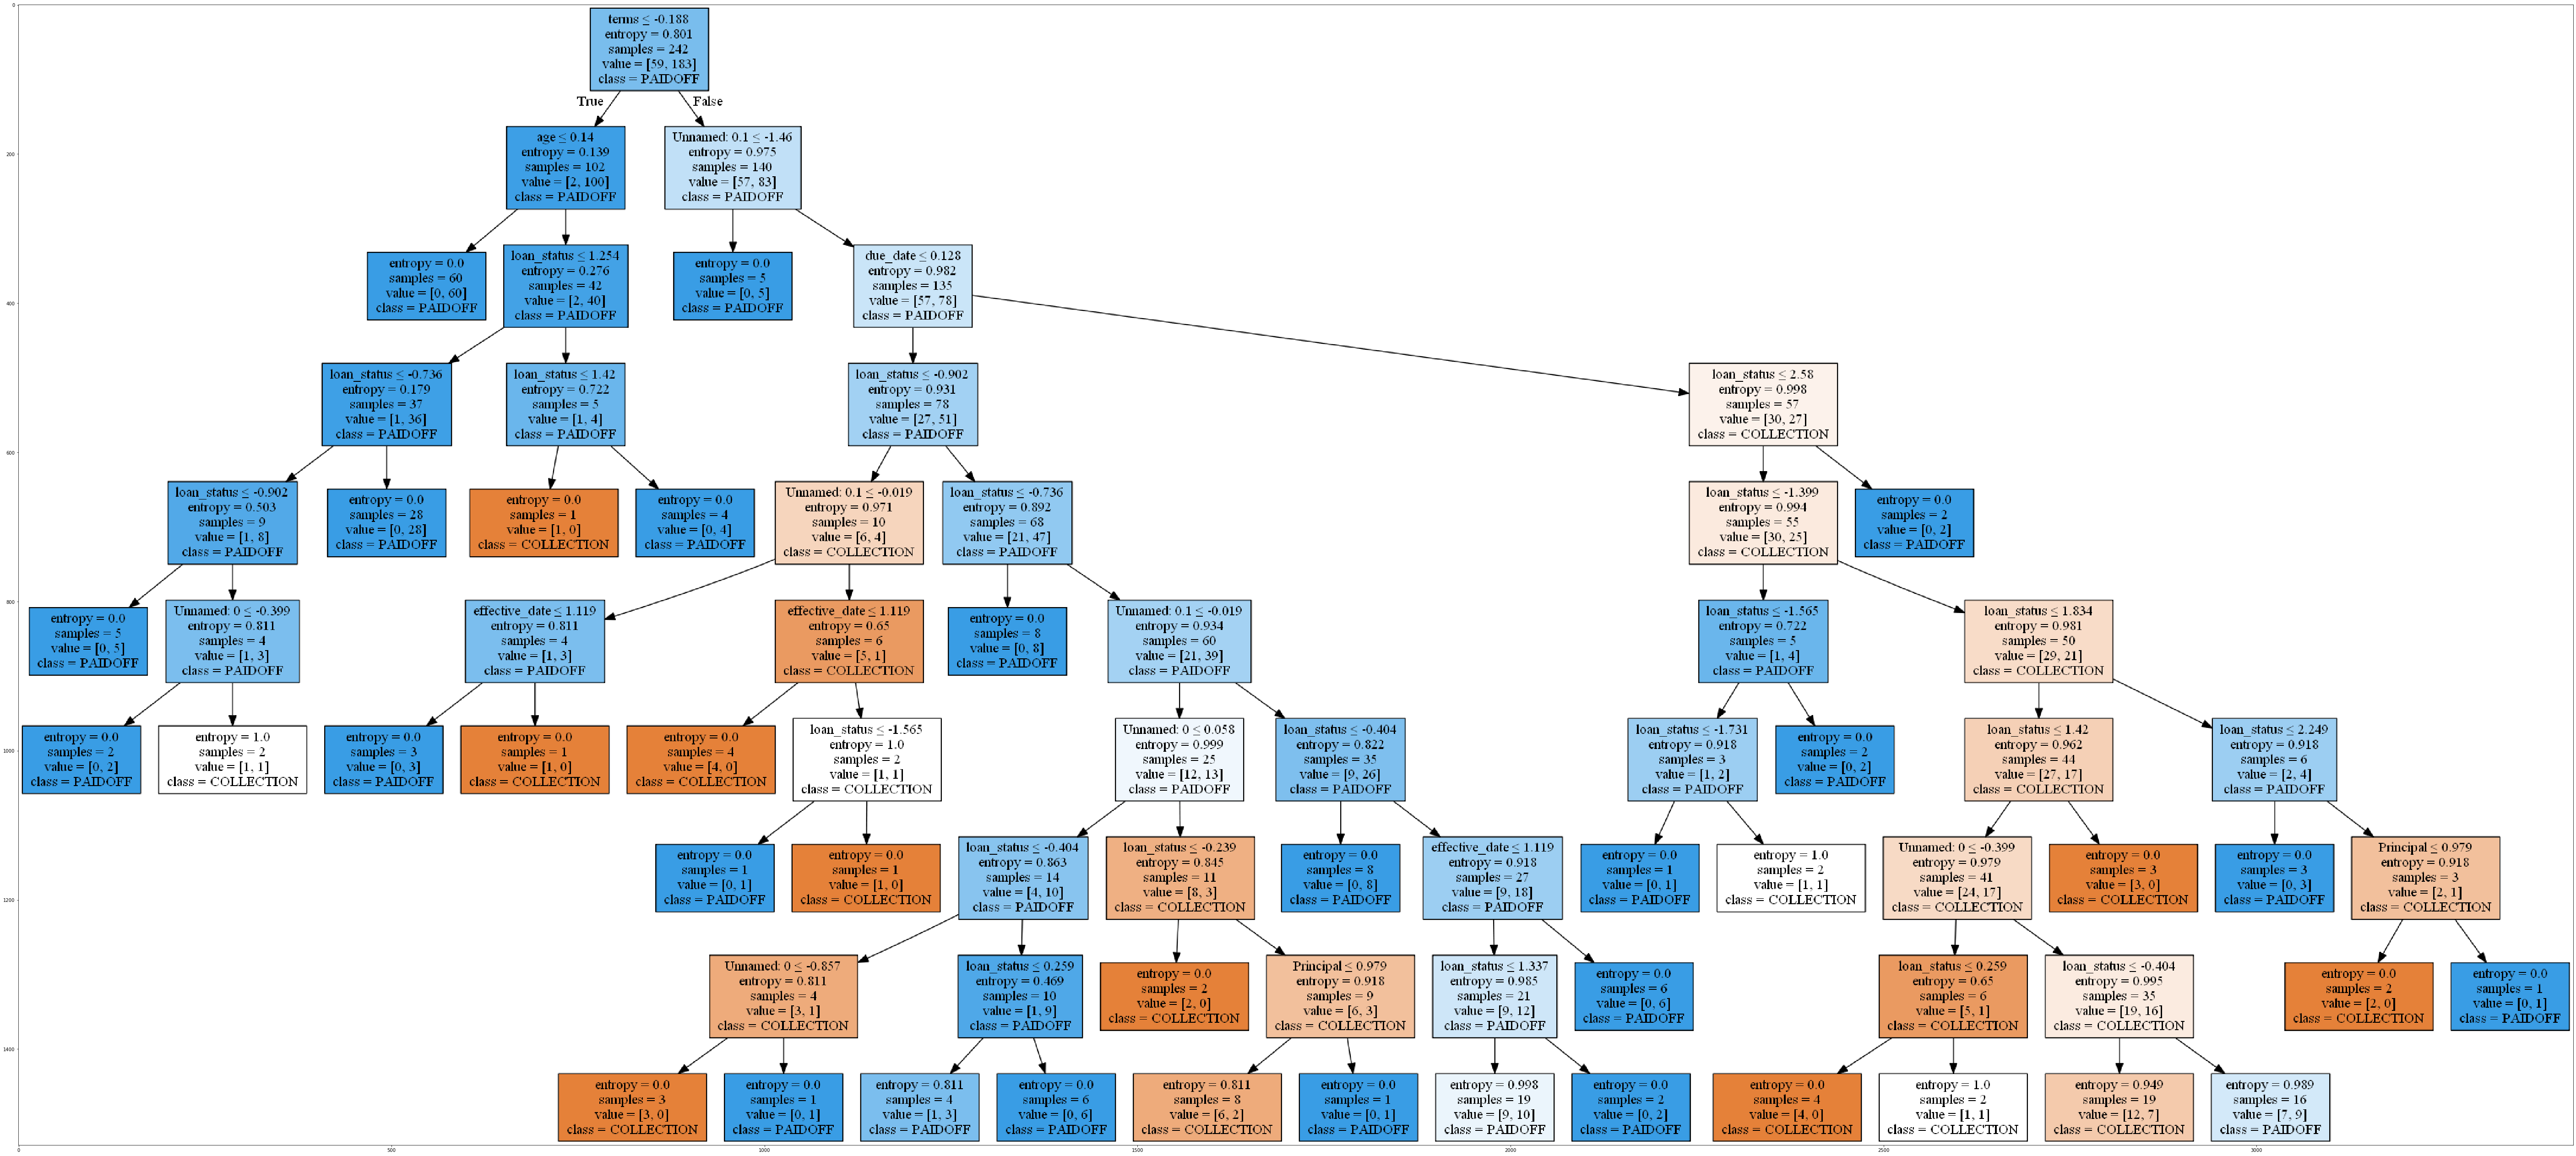

In [24]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()

filename = "Loan_train_tree.png"
#8 columns
featureNames = df.columns[0:8]
#target
targetNames = df['loan_status'].unique().tolist()

out= tree.export_graphviz(DTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainDT), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [25]:
# import the necessary libraries
from sklearn import svm

# #split dataset into train and test set- 80/20
X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split( X, y, test_size=0.20, random_state=4)
print ('Train set:', X_trainSVM.shape,  y_trainSVM.shape)
print ('Test set:', X_testSVM.shape,  y_testSVM.shape)

#making an instance of the model and training it 
clf = svm.SVC(kernel='rbf')

#Training Model with X_trainSVM and y_train_SVM
clf.fit(X_trainSVM, y_trainSVM)

# predicting with X_testSVM
yhat_SVM = clf.predict(X_testSVM)
yhat_SVM [0:5]

# Accuracy evaluation
print('\nAccuracy of Support Vector Machine on training set is: %.2f'% clf.score(X_trainSVM, y_trainSVM))
print('Accuracy of Support Vector Machine on testing set is: %.2f'% clf.score(X_testSVM, y_testSVM))


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)

Accuracy of Support Vector Machine on training set is: 0.78
Accuracy of Support Vector Machine on testing set is: 0.74


## Accuracy evaluation: 
### F1 and Jaccard scores

In [26]:
from sklearn.metrics import f1_score
print('SVM F1 score:%.2f'% f1_score(y_testSVM, yhat_SVM, average='weighted'))

from sklearn.metrics import jaccard_similarity_score
print('SVM jaccard score:%.2f'% jaccard_similarity_score(y_testSVM, yhat_SVM))


SVM F1 score:0.73


ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (C:\Users\Kin1\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

## confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_testSVM, yhat_SVM, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_testSVM, yhat_SVM))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')


# Logistic Regression

In [ ]:
# loan_status
y_LogR.value_counts()

260 people have paid off the loan on time while 86 have gone into collection

In [ ]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#split dataset into train and test set
X_train_Lg, X_test_Lg, y_train_Lg, y_test_Lg = train_test_split( X, y, test_size=0.20, random_state=4)
print ('Train set:', X_train_Lg.shape,  y_train_Lg.shape)
print ('Test set:', X_test_Lg.shape,  y_test_Lg.shape)

#making an instance of the model and training it
# fit model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_Lg,y_train_Lg)
LR

#Predicting model
yhat_LR = LR.predict(X_test_Lg)
yhat_prob_LR = LR.predict_proba(X_test_Lg)
#yhat_prob_LR 

# Accuracy evaluation
print('\nAccuracy of Logistic regression classifier on training set: %.2f'% (LR.score(X_train_Lg, y_train_Lg)))
print('Accuracy of Logistic regression classifier on testing set: %.2f'% (LR.score(X_test_Lg, y_test_Lg)))

## Accuracy evaluation:
### F1, Jaccard and Log_Loss scores

In [ ]:
from sklearn.metrics import jaccard_similarity_score
print('Jaccard score: %.2f'% (jaccard_similarity_score(y_test_Lg, yhat_LR)))

from sklearn.metrics import f1_score
print('F1_score: %.2f'% (f1_score(y_test_Lg, yhat_LR, average='weighted')))

from sklearn.metrics import log_loss
print('Log_loss score: %.2f'% (log_loss(y_test_Lg, yhat_prob_LR)))
#y_LogR[0:5]

### confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
cnf_matrix = confusion_matrix(y_test_Lg, yhat_LR, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')


## Model Evaluation using Test set

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [ ]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

## Load Test set for evaluation 

In [ ]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

In [ ]:
test_df.dtypes
test_df.shape

### Pre-processing: Feature selection/extraction
#### Convert due date, effective data and gender objects

In [ ]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(
    to_replace = ['male','female'], value=[0,1],inplace=True)
test_df.head()

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [ ]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]

# append education variables to test_feature df
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

In [ ]:
test_df.dtypes
test_Feature.shape

In [ ]:
X_newset=test_Feature
X_newset= preprocessing.StandardScaler().fit(X_newset).transform(X_newset)
X_newset[0:5]

In [ ]:
y_newset=np.asarray(test_df['loan_status'])
y_newset[0:5]

## Evaluate Models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat_KNN_ev=neigh.predict(X_newset)

Jaccard_KNN_ev = jaccard_similarity_score(y_newset, yhat_KNN_ev)
F1_KNN_ev = f1_score(y_newset, yhat_KNN_ev, average='weighted')
print("KNN F1-score: %.2f" % F1_KNN_ev )
print("KNN Jaccard Score: %.2f" % Jaccard_KNN_ev)

In [ ]:
#Decistion Tree algorithm already trained
yhat_DT_ev= DTree.predict(X_newset)

Jaccard_DT_ev = jaccard_similarity_score(y_newset, yhat_DT_ev)
F1_DT_ev = f1_score(y_newset, yhat_DT_ev, average='weighted')
print("DTree F1-score: %.2f" % F1_DT_ev )
print("DTree Jaccard Score: %.2f" % Jaccard_DT_ev)

In [ ]:
#Support Vector Machine algorithm already trained
yhat_SVM_ev = clf.predict(X_newset)

Jaccard_SVM_ev = jaccard_similarity_score(y_newset, yhat_SVM_ev)
F1_SVM_ev = f1_score(y_newset, yhat_SVM_ev, average='weighted')
print("SVM F1-score: %.2f" % F1_SVM_ev )
print("SVM Jaccard Score: %.2f" % Jaccard_SVM_ev)

In [ ]:
#Logistic Regression algorithm already trained
yhat_LR_ev = LR.predict(X_newset)
yhat_prob_LR_ev = LR.predict_proba(X_newset)                       

Jaccard_LR_ev = jaccard_similarity_score(y_newset, yhat_LR_ev)
F1_LR_ev = f1_score(y_newset, yhat_LR_ev, average='weighted')
Logloss_LR_ev = log_loss(y_newset, yhat_prob_LR_ev)

print("Logistic Regression F1-score: %.2f" % F1_LR_ev )
print('Logistic Regression Jaccard Score: %.2f'% Jaccard_LR_ev)
print('Logistic Regression log_loss: %.2f'% Logloss_LR_ev)

print('\nAccuracy of Logistic regression classifier on testing set is: %.2f'% LR.score(X_newset, y_newset))

# Report
You should be able to report the accuracy of the built model using different evaluation metrics: